In [6]:
import spectogramConverter as sc

In [7]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

In [9]:
## Validation
create_pngs_from_wavs(sc.input_val_path_fake, sc.spect_val_directory_fake)
create_pngs_from_wavs(sc.input_val_path_real, sc.spect_val_directory_real)
## Training
create_pngs_from_wavs(sc.input_train_path_fake, sc.spect_train_directory_fake)
create_pngs_from_wavs(sc.input_train_path_real, sc.spect_train_directory_real)
## Testing
create_pngs_from_wavs(sc.input_test_path_fake, sc.spect_test_directory_fake)
create_pngs_from_wavs(sc.input_test_path_real, sc.spect_test_directory_real)

In [10]:
from tensorflow.keras.utils import load_img, img_to_array 

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(img_to_array(load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

In [11]:
import keras
keras.__version__

'3.6.0'

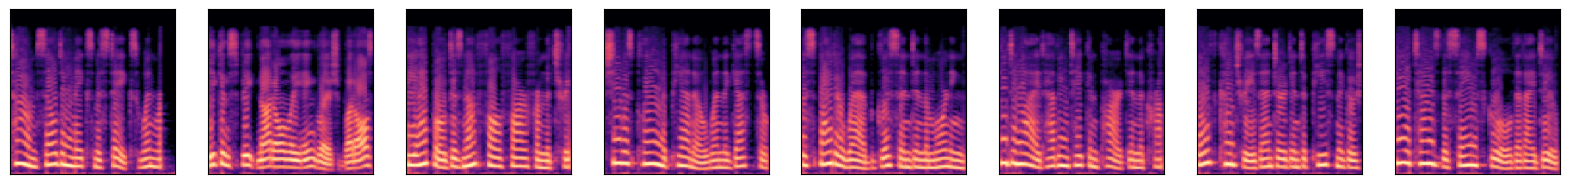

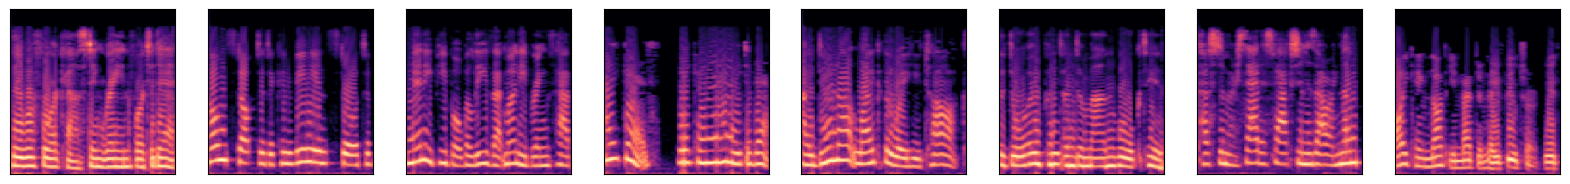

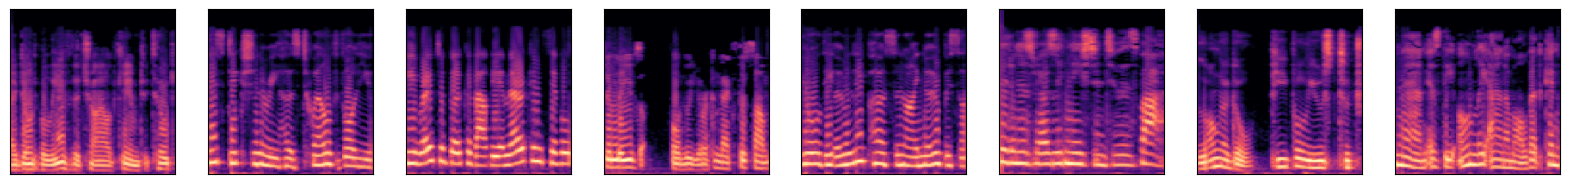

In [12]:
images, labels = load_images_from_path(sc.spect_test_directory_fake, 0)
show_images(images)
    
x += images
y += labels

images, labels = load_images_from_path(sc.spect_train_directory_fake, 0)
show_images(images)
    
x += images
y += labels

images, labels = load_images_from_path(sc.spect_val_directory_fake, 0)
show_images(images)
    
x += images
y += labels

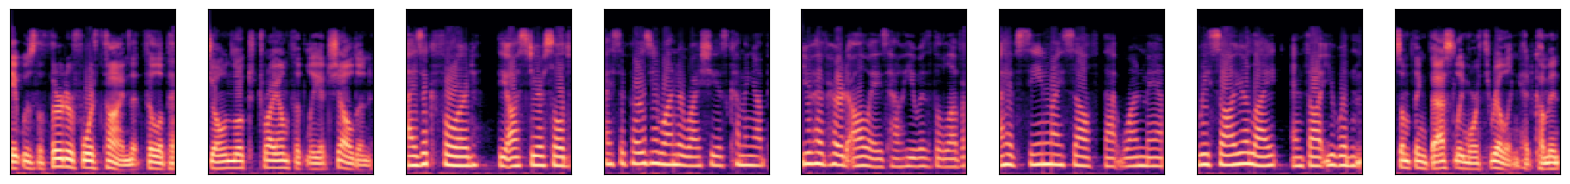

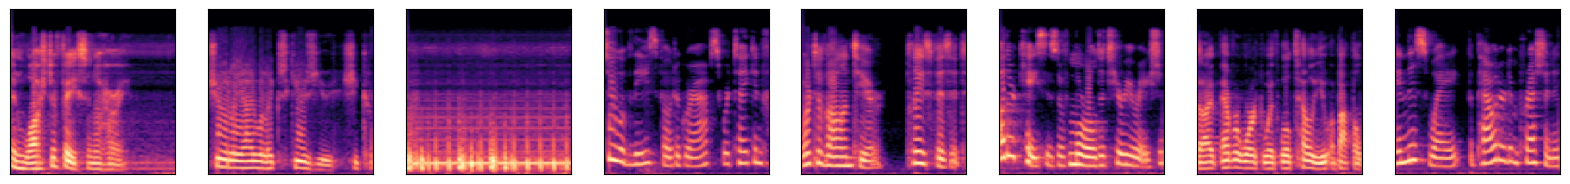

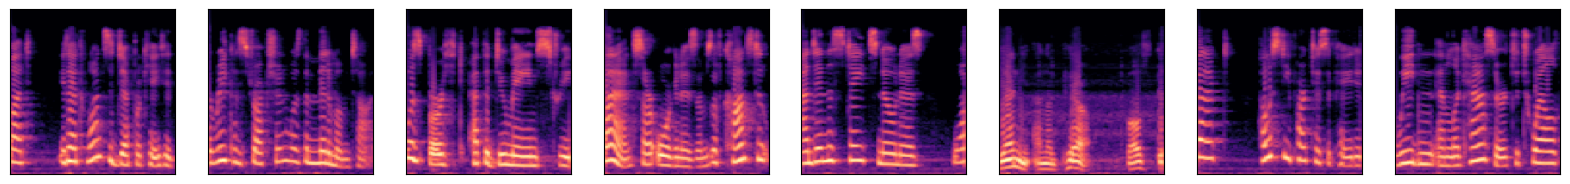

In [13]:
images, labels = load_images_from_path(sc.spect_test_directory_real, 1)
show_images(images)
    
x += images
y += labels

images, labels = load_images_from_path(sc.spect_train_directory_real, 1)
show_images(images)
    
x += images
y += labels

images, labels = load_images_from_path(sc.spect_val_directory_real, 1)
show_images(images)
    
x += images
y += labels

In [14]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.5, random_state=42)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [15]:
print('Train image shape',x_train_norm[0].shape, '\n', len(x_train_norm))
print('Train labels',y_train_encoded[0], '\n', y_train_encoded.shape)
print('Test image shape',x_test_norm[0].shape, '\n', len(x_test_norm))
print('Test labels',y_test_encoded[0:10], '\n', y_test_encoded.shape)

Train image shape (224, 224, 3) 
 6634
Train labels [1. 0.] 
 (6634, 2)
Test image shape (224, 224, 3) 
 6634
Test labels [[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]] 
 (6634, 2)


In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/Users/shivamgoyal/miniforge3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    18,875,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,210,498 (73.28 MB)

 Trainable params: 19,210,498 (73.28 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 179s 268ms/step - accuracy: 0.6276 - loss: 0.6244 - val_accuracy: 0.8062 - val_loss: 0.4147
Epoch 2/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 164s 247ms/step - accuracy: 0.8329 - loss: 0.3574 - val_accuracy: 0.8979 - val_loss: 0.2422
Epoch 3/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 162s 244ms/step - accuracy: 0.9146 - loss: 0.2027 - val_accuracy: 0.9325 - val_loss: 0.1701
Epoch 4/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 163s 245ms/step - accuracy: 0.9515 - loss: 0.1205 - val_accuracy: 0.9358 - val_loss: 0.1623
Epoch 5/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 166s 250ms/step - accuracy: 0.9739 - loss: 0.0704 - val_accuracy: 0.9480 - val_loss: 0.1491
Epoch 6/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 178s 268ms/step - accuracy: 0.9843 - loss: 0.0456 - val_accuracy: 0.9578 - val_loss: 0.1232
Epoch 7/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 166s 250ms/step - accuracy: 0.9902 - loss: 0.0304 - val_accuracy: 0.9396 - val_loss: 0.2987
Epoch 8/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 166s 250ms/step - accuracy: 0.9839 -

In [37]:
# View weights learnt by the model
model.save_weights(sc.main_directory+'CNN/my_checkpoint.weights.h5')
model.save(sc.main_directory+ 'CNN/my_model.h5')

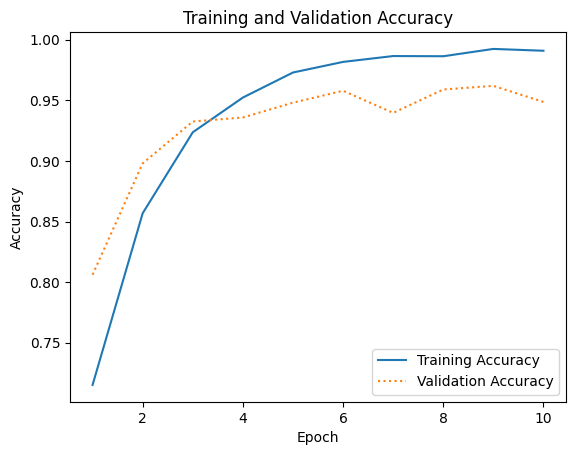

In [38]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.close()

In [39]:
print(acc)

[0.7152547240257263, 0.8567982912063599, 0.9235755205154419, 0.952215850353241, 0.9728670716285706, 0.9816098809242249, 0.9864335060119629, 0.9862827658653259, 0.9923123121261597, 0.9908049702644348]


In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    18,875,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,631,496 (219.85 MB)

 Trainable params: 19,210,498 (73.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,420,998 (146.56 MB)